In [22]:
from lazy import lazy
import gzip
import os
import csv
import string
import pandas as pd
import numpy as np
from itertools import islice
import urllib
import matplotlib.pyplot as plt
from keras.datasets import mnist
import seaborn as sns
import matplotlib
from tkinter import *
import PIL
from PIL import Image, ImageDraw, ImageFont,ImageOps
from sklearn.metrics import accuracy_score
from sklearn import datasets, tree, metrics
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
def _read(filepath):
    with gzip.open(filepath, 'rt') as file_:
        reader = csv.reader(file_, delimiter='\t')
        lines = list(reader)
        return lines

In [3]:
def _parse(lines):
    lines = sorted(lines, key=lambda x: int(x[0]))
    data, target = [], []
    next_ = None
    for line in lines:
        if not next_:
            data.append([])
            target.append([])
        else:
            assert next_ == int(line[0])
        next_ = int(line[2]) if int(line[2]) > -1 else None
        pixels = np.array([int(x) for x in line[6:134]])
        data[-1].append(pixels)
        target[-1].append(line[1])
    return data, target

In [4]:
def _pad(data, target):
    max_length = max(len(x) for x in target)
    padding = np.zeros((16, 8))
    data = [x + ([padding] * (max_length - len(x))) for x in data]
    target = [x + ([''] * (max_length - len(x))) for x in target]
    return np.array(data), np.array(target)

In [5]:
URL = 'http://ai.stanford.edu/~btaskar/ocr/letter.data.gz'
path, _ = urllib.request.urlretrieve(URL)
lines = _read(path)
data, target = _parse(lines)
data1=np.array(data)
target1=np.array(target)
data,target = _pad(data, target)  
new_data =[]
new_target=[]
for i in range(0,len(data1)):
    for x in data1[i]:
        new_data.append(x) 
    for x in target1[i]:
        new_target.append(x) 
new_data=np.array(new_data)
new_target=np.array(new_target)

In [6]:
def plot_word(x, y):
    n_letters = x.shape[0]
    print(n_letters)
    plt.figure(1, figsize=(90, 10))

    for i, (letter_img, char_img) in enumerate(zip(x, y)):
        let = char_img if any(char_img) else '_'
        plt.subplot(1, n_letters, i+1)
        plt.title('letter: {}'.format(let), fontsize=60)
        plt.imshow(letter_img.reshape(16, 8), cmap='gray_r')
    plt.show()

14


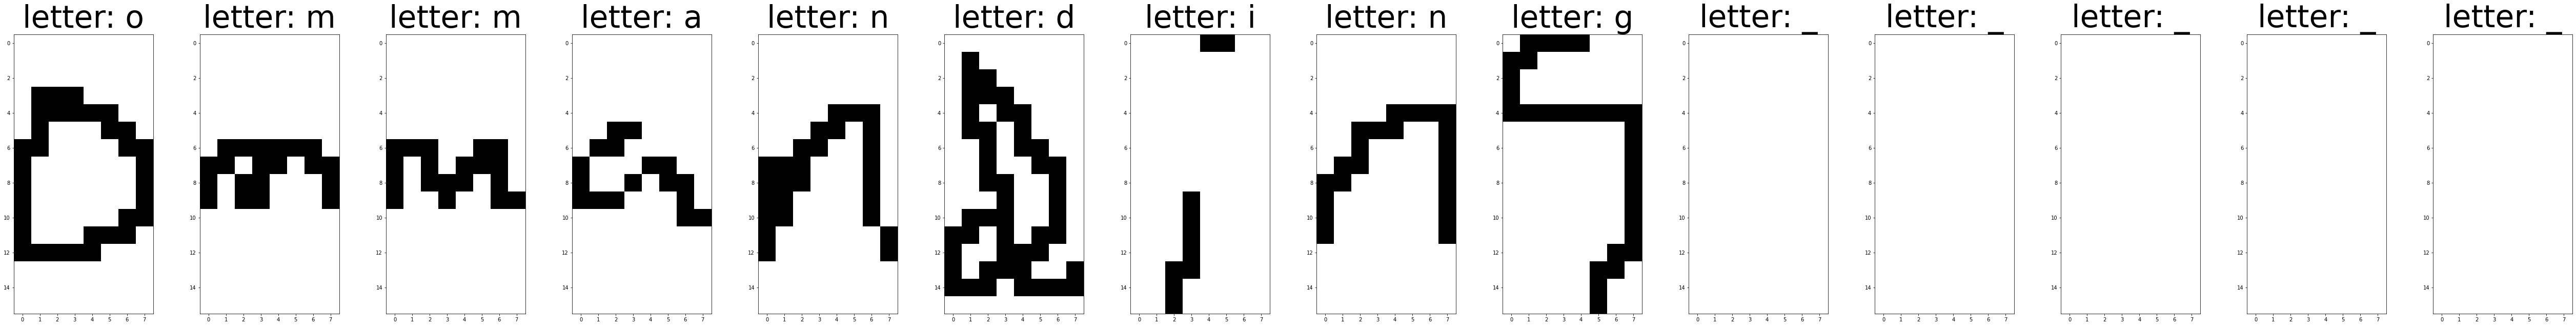

In [7]:
x = data[0]
y = target[0]
plot_word(x, y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1
 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] o


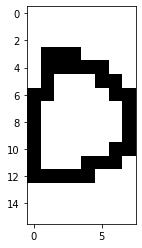

In [8]:
x = data[0,0]
y = target[0,0]
plt.imshow(x.reshape(16, 8), cmap='gray_r')
let = y if any(y) else '_'
print(x,y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split( new_data, new_target, test_size=0.2, shuffle=False)
model = tree.DecisionTreeClassifier(criterion="entropy", random_state=33 )
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=33)

In [10]:
predicted = model.predict(X_test)

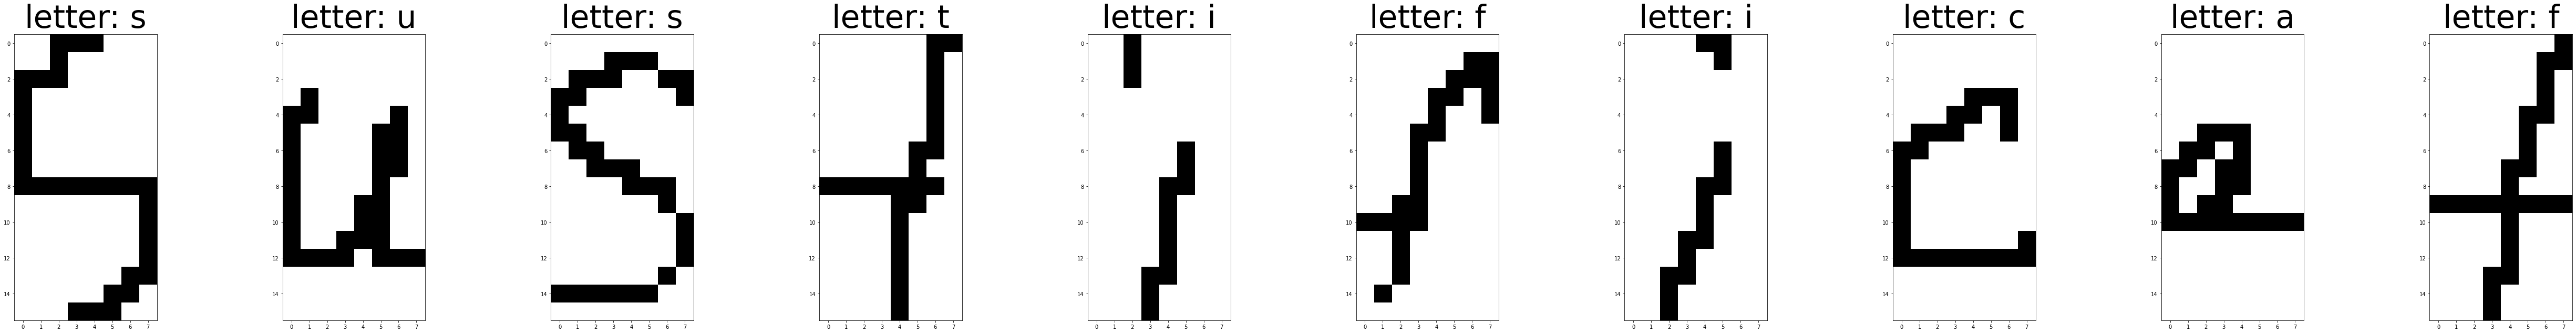

In [11]:
x=X_test[10:20]
y=predicted[10:20]
plt.figure(1, figsize=(90, 10))
for i, (letter_img, char_img) in enumerate(zip(x, y)):
    let = char_img if any(char_img) else '_'
    plt.subplot(1, 10, i+1)
    plt.title('Result: {}'.format(let), fontsize=60)
    plt.imshow(letter_img.reshape(16, 8), cmap='gray_r')
plt.show()

In [12]:
print("Classification report for classifier %s:\n%s\n"%(model, metrics.classification_report(y_test, predicted))) 

Classification report for classifier DecisionTreeClassifier(criterion='entropy', random_state=33):
              precision    recall  f1-score   support

           a       0.83      0.71      0.76      1167
           b       0.82      0.70      0.75       424
           c       0.79      0.85      0.82       416
           d       0.80      0.57      0.66       562
           e       0.87      0.78      0.82      1274
           f       0.51      0.38      0.43       247
           g       0.49      0.65      0.56       233
           h       0.62      0.61      0.61       238
           i       0.80      0.83      0.82      1025
           j       0.00      0.00      0.00         0
           k       0.31      0.50      0.38        92
           l       0.79      0.79      0.79       865
           m       0.63      0.84      0.72       186
           n       0.71      0.84      0.77       679
           o       0.75      0.85      0.80       465
           p       0.43      0.70   

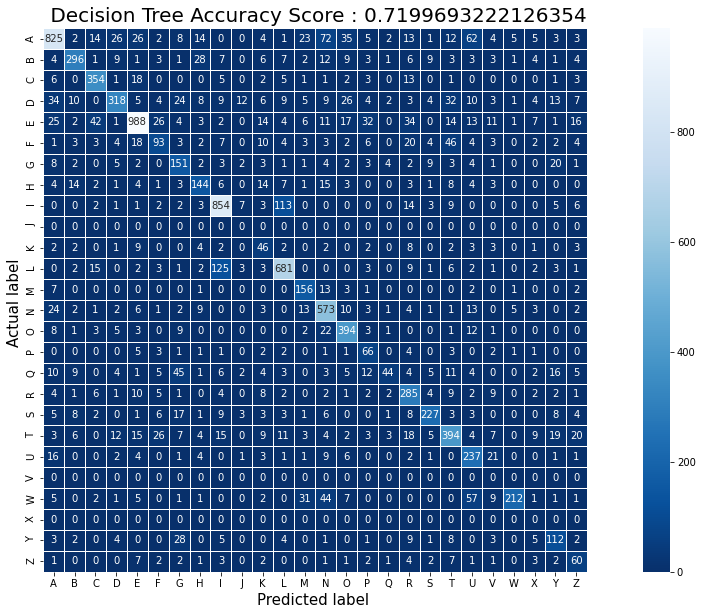

In [13]:
tree_score=metrics.accuracy_score(y_test, predicted) 
tree_cm=metrics.confusion_matrix(y_test,predicted)
df_cm = pd.DataFrame(tree_cm, index = [i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"],
                  columns = [i for i in "ABCDEFGHIJKLMNOPQRSTUVWXYZ"])
plt.figure(figsize = (20,10))
sns.heatmap(df_cm, annot=True,fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label ',size = 15); 
plt.xlabel('Predicted label ',size = 15) ;
title = ' Decision Tree Accuracy Score : {0}'.format(tree_score)
plt.title(title, size = 20);

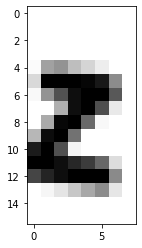

In [14]:
img = Image.open('C:/Users/HOANG NAM/Desktop/digit.jpg').convert("L").resize((8,16))
img = ImageOps.invert(img) 
img2 = np.array(img)
plt. imshow(img2, cmap=plt.cm.gray_r, interpolation='nearest')

In [15]:
img2

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  4,  94, 108,  65,  42,  18,   0,   0],
       [ 38, 255, 255, 255, 249, 230, 115,   0],
       [  6, 107, 174, 241, 255, 255, 167,   0],
       [  0,   0,  80, 241, 255, 177,  22,   0],
       [  0,  85, 248, 255, 149,   7,   0,   0],
       [ 72, 243, 255, 140,   0,   0,   0,   0],
       [228, 255, 175,  10,   0,   0,   0,   0],
       [255, 255, 241, 216, 195, 152,  34,   0],
       [186, 219, 241, 255, 255, 255, 117,   0],
       [  0,   9,  26,  56,  87, 115,  25,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [16]:
img3=img2.reshape([1,128]) 
img3[img3 < 239] = 0 
img3

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255, 255, 255, 249,   0,   0,   0,   0,   0,   0, 241,
        255, 255,   0,   0,   0,   0,   0, 241, 255,   0,   0,   0,   0,
          0, 248, 255,   0,   0,   0,   0,   0, 243, 255,   0,   0,   0,
          0,   0,   0, 255,   0,   0,   0,   0,   0,   0, 255, 255, 241,
          0,   0,   0,   0,   0,   0,   0, 241, 255, 255, 255,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=uint8)

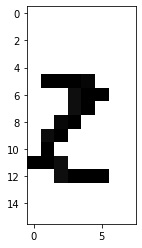

In [17]:
plt.imshow(img2, cmap=plt.cm.gray_r, interpolation='nearest')

In [18]:
y_pred = model.predict(img3)
print("Kết quả dự đoán là: " + y_pred[0])

Kết quả dự đoán là: z


In [23]:
canvas_width=160
canvas_height=320
gray = (255,255,255)
def paint(event):
    x1,y1 = (event.x-20),(event.y-20)
    x2,y2=(event.x+20),(event.y+20)
    c.create_oval(x1,y1,x2,y2,fill="black",outline="black")
    draw.ellipse((x1,y1,x2,y2),fill="black",outline="black")
def xoa():
    global img,draw
    img=PIL.Image.new("RGB",(160,320),gray)
    draw = ImageDraw.Draw(img)
    c.delete("all")
    

def result():
    filename="C:/Users/HOANG NAM/Desktop/digit.jpg"
    img.save(filename)
    lbl['text']='Kết quả: ' +loadimg(filename)
    

def loadimg(filename):
    img = Image.open(filename).convert("L").resize((8,16))
    img = ImageOps.invert(img) 
    img2 = np.array(img)
    img3=img2.reshape([1,128]) 
    img3[img3 < 239] = 0 
    y_pred = model.predict(img3)
    return y_pred[0]


master=Tk()
master.title('paint')
c=Canvas(master,width=canvas_width,height=canvas_height,bg="white")
c.pack()

c.pack(expand=YES,fill=BOTH)
c.bind('<B1-Motion>',paint)

btresult=Button(text="result",command=result,padx=50,fg="blue")
btresult.pack()

btclear=Button(text="Clear",command=xoa,padx=50,fg="blue")
btclear.pack()

lbl = Label(master, text="")
lbl.pack()

master.mainloop()

In [20]:
accuracy_score(y_test, predicted)

0.7199693222126354

[Text(528.3829077986804, 536.8050000000001, 'X[64] <= 0.5\nentropy = 4.306\nsamples = 41721\nvalue = [2867, 860, 1698, 880, 3681, 674, 2239, 623, 3888\n189, 817, 2275, 1416, 4345, 3432, 1283, 140, 2310\n1075, 1537, 2251, 664, 140, 413, 1033, 991]'),
 Text(336.9565873752102, 523.215, 'X[65] <= 0.5\nentropy = 4.09\nsamples = 20143\nvalue = [309, 604, 88, 775, 487, 460, 2079, 387, 3833, 184\n415, 2185, 80, 975, 353, 960, 126, 817, 985, 1162\n224, 394, 16, 396, 1021, 828]'),
 Text(239.63604853554224, 509.625, 'X[87] <= 0.5\nentropy = 3.616\nsamples = 14910\nvalue = [82, 271, 12, 616, 120, 342, 1982, 155, 3749, 183\n114, 2119, 7, 153, 84, 447, 114, 232, 913, 1034\n37, 172, 2, 304, 981, 685]'),
 Text(181.50464452179872, 496.035, 'X[78] <= 0.5\nentropy = 3.43\nsamples = 12237\nvalue = [33, 160, 12, 512, 102, 326, 1089, 122, 3730, 157\n110, 2119, 3, 65, 41, 446, 94, 230, 328, 968, 16\n114, 2, 222, 794, 442]'),
 Text(128.64908848785012, 482.44500000000005, 'X[58] <= 0.5\nentropy = 3.121\nsample

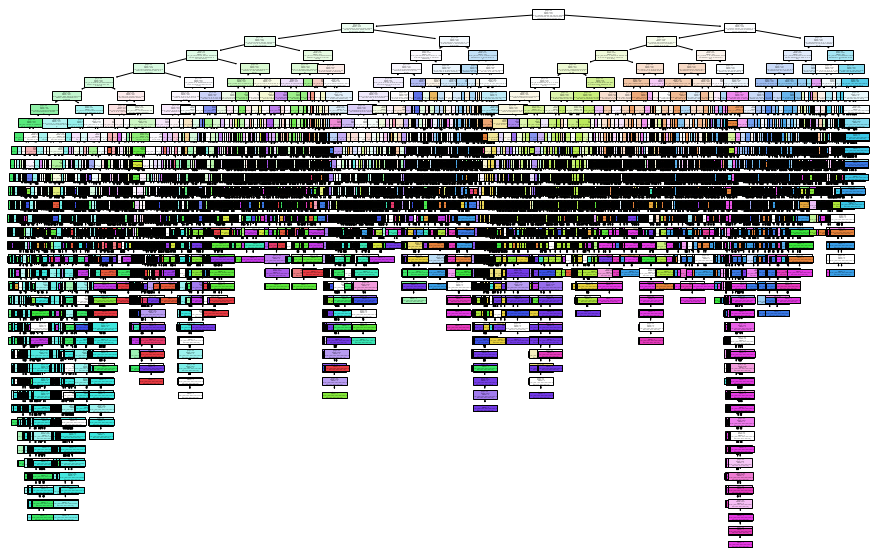

In [32]:
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [25]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=33, 
                             ccp_alpha=ccp_alphas[3130],
                             max_depth=50,
                             min_samples_split=8
                            )
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
accuracy_score(y_test, pred)

0.7240916498897517

[Text(514.0805851451563, 534.2275862068966, 'X[64] <= 0.5\nentropy = 4.306\nsamples = 41721\nvalue = [2867, 860, 1698, 880, 3681, 674, 2239, 623, 3888\n189, 817, 2275, 1416, 4345, 3432, 1283, 140, 2310\n1075, 1537, 2251, 664, 140, 413, 1033, 991]'),
 Text(314.16024113196556, 515.4827586206897, 'X[65] <= 0.5\nentropy = 4.09\nsamples = 20143\nvalue = [309, 604, 88, 775, 487, 460, 2079, 387, 3833, 184\n415, 2185, 80, 975, 353, 960, 126, 817, 985, 1162\n224, 394, 16, 396, 1021, 828]'),
 Text(217.76604055422234, 496.73793103448276, 'X[87] <= 0.5\nentropy = 3.616\nsamples = 14910\nvalue = [82, 271, 12, 616, 120, 342, 1982, 155, 3749, 183\n114, 2119, 7, 153, 84, 447, 114, 232, 913, 1034\n37, 172, 2, 304, 981, 685]'),
 Text(157.96953287079836, 477.99310344827586, 'X[78] <= 0.5\nentropy = 3.43\nsamples = 12237\nvalue = [33, 160, 12, 512, 102, 326, 1089, 122, 3730, 157\n110, 2119, 3, 65, 41, 446, 94, 230, 328, 968, 16\n114, 2, 222, 794, 442]'),
 Text(107.39904435041761, 459.24827586206897, 'X[58

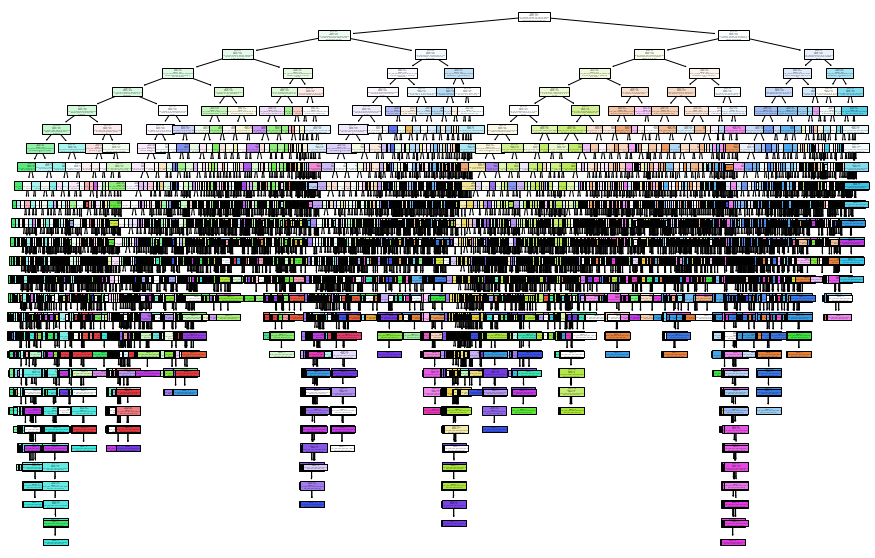

In [26]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)